# Business and organizations AI Research on France


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:

research = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/scopus.csv")
research.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Borsato A.; Lorentz A.,"Borsato, Andrea (57753898000); Lorentz, André ...",57753898000; 24168829900,Data production and the coevolving AI trajecto...,2023,Journal of Evolutionary Economics,33,5,NaN,1427,...,NaN,NaN,NaN,English,J. Evol. Econ.,Article,Final,NaN,Scopus,2-s2.0-85173723917
1,Thomas A.; Durmaz A.R.; Alam M.; Gumbsch P.; S...,"Thomas, Akhil (57196540916); Durmaz, Ali Riza ...",57196540916; 57188693550; 57201532578; 7005700...,Materials fatigue prediction using graph neura...,2023,Scientific Reports,13,1,12562,NaN,...,NaN,NaN,37532871.0,English,Sci. Rep.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85166403562
2,Beliaeva T.; Mangematin V.; Guerraz A.,"Beliaeva, Tatiana (57190160367); Mangematin, V...",57190160367; 55904008400; 57931299800,Emerging artificial intelligence methods for p...,2023,De Gruyter Handbook of SME Entrepreneurship,NaN,NaN,NaN,467,...,978-311074765-2; 978-311074752-2,NaN,NaN,English,De Gruyter Handb. of SME Entrepreneurship,Book chapter,Final,NaN,Scopus,2-s2.0-85177454689
3,Corsini T.; Deschamps Q.; Feghali C.; Gonçalve...,"Corsini, Timothée (57670950600); Deschamps, Qu...",57670950600; 57243078400; 56330035200; 5531626...,Partitioning into degenerate graphs in linear ...,2023,European Journal of Combinatorics,114,NaN,103771,NaN,...,NaN,EJOCD,NaN,English,Eur. J. Comb.,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85167980806
4,Rafner J.; Beaty R.E.; Kaufman J.C.; Lubart T....,"Rafner, Janet (57200274801); Beaty, Roger E. (...",57200274801; 55044203700; 7403022406; 66024535...,Creativity in the age of generative AI,2023,Nature Human Behaviour,7,11,NaN,1836,...,NaN,NaN,37985916.0,English,Nat. Hum. Behav.,Note,Final,NaN,Scopus,2-s2.0-85177072809


In [17]:
columns_n = data.columns.tolist()
print(columns_n)


['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts', 'References', 'Correspondence Address', 'Editors', 'Publisher', 'Sponsors', 'Conference name', 'Conference date', 'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID', 'Language of Original Document', 'Abbreviated Source Title', 'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID']


In [14]:
research.describe()

,Year,Page count,Cited by,Conference code,PubMed ID
count,7739.000000,6380.000000,7710.000000,3323.000000,3.770000e+02
mean,2014.738597,20.634639,20.280674,166090.113753,2.792654e+07
std,8.522818,153.988218,108.907341,62790.262558,8.896190e+06
min,1970.000000,-67.000000,0.000000,10270.000000,1.657272e+06
25%,2010.000000,9.000000,1.000000,118242.000000,2.345744e+07
50%,2018.000000,13.000000,4.000000,167509.000000,3.071856e+07
75%,2021.000000,19.000000,14.000000,192978.000000,3.481142e+07
max,2023.000000,11949.000000,6152.000000,306029.000000,3.813360e+07


In [15]:
data = research
# Extract descriptions from the 'description' column of the dataframe
documents = research['Abstract'].tolist()
documents = [f'"""{doc}"""' for doc in documents]
#documents

### Trend in AI and Machine Learning Research in Business and Management

The graph illustrates the number of publications related to AI and machine learning in business and management per year. It shows a trend in the volume of research in this field, which can be indicative of the growing interest and importance of AI and machine learning in these areas.

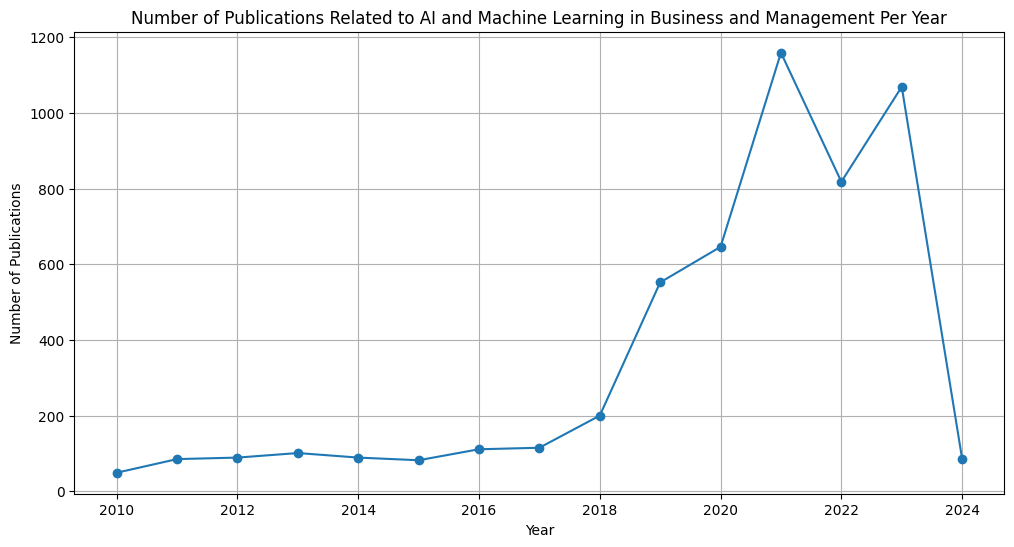

In [11]:
# Filter the dataset for relevant publications (considering all as relevant for now)
# and count the number of publications per year
publication_count = data['Year'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(publication_count.index, publication_count.values, marker='o')
plt.title('Number of Publications Related to AI and Machine Learning in Business and Management Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

### Topics of interest within these publications. 

The word cloud visualizes the most frequent terms in the titles of AI and machine learning publications related to business and management. This visualization helps us identify key themes and topics that are prominent in the research.

From the word cloud, we can observe terms that might be associated with the impact points you mentioned, such as "automation," "decision-making," "resource," "planning," and "ethical." This suggests that these areas are indeed focal points in the research on AI and machine learning in the context of work organization.

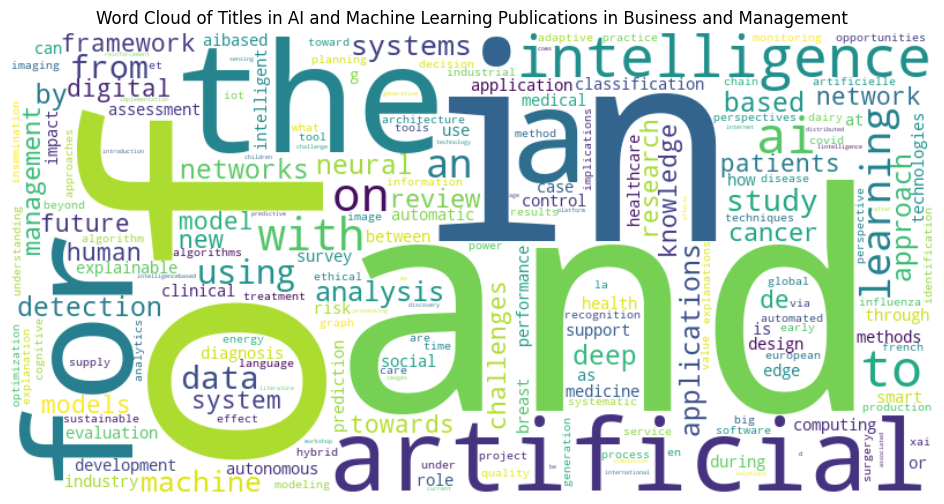

In [12]:


# Function to clean and prepare text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    return text

# Prepare the titles for analysis
titles = data['Title'].dropna().apply(clean_text)

# Combine all titles into a single string
all_titles = ' '.join(titles)

# Create a word frequency dictionary
word_freq = Counter(all_titles.split())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles in AI and Machine Learning Publications in Business and Management')
plt.show()
